# Predicting Customer Churn in Telecommunications Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Looking at the data

In [2]:
telcom = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
telcom.info()
#telcom.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
list(telcom.columns.values)
#list(telcom)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
print 'total number of observations -', telcom.shape[0]
print 'total number of features -', telcom.shape[1]

total number of observations - 7043
total number of features - 21


In [8]:
print 'Customer''s demographic information\n', list(telcom)[1:5]

Customers demographic information
['gender', 'SeniorCitizen', 'Partner', 'Dependents']


In [9]:
print 'Customer''s account information\n', list(telcom)[15:20]+[(list(telcom)[5])]

Customers account information
['Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure']


In [10]:
print 'Customers signed up for services include\n',list(telcom)[6:15]

Customers signed up for services include
['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [16]:
#checking for missing data
telcom.isnull().sum().values.sum()

0

The dataset looks clean and there is no missing values

In [12]:
telcom.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
         ...   
7013     3756.4
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019        826
7020        239
7021      727.8
7022     7544.3
7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Leng

In [85]:
print ("\nUnique values :  \n",telcom.nunique())

('\nUnique values :  \n', customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64)


In [14]:
def rstr(df): return df.shape, df.apply(lambda x: [x.unique()])

print(rstr(telcom))

((7043, 21), customerID          [[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFO...
gender                                               [[Female, Male]]
SeniorCitizen                                                [[0, 1]]
Partner                                                   [[Yes, No]]
Dependents                                                [[No, Yes]]
tenure              [[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58,...
PhoneService                                              [[No, Yes]]
MultipleLines                           [[No phone service, No, Yes]]
InternetService                              [[DSL, Fiber optic, No]]
OnlineSecurity                       [[No, Yes, No internet service]]
OnlineBackup                         [[Yes, No, No internet service]]
DeviceProtection                     [[No, Yes, No internet service]]
TechSupport                          [[No, Yes, No internet service]]
StreamingTV                          [[No, Yes, No internet service]]
Streami

In [86]:
churn = telcom[telcom['Churn']=='Yes']
notchurn = telcom[telcom['Churn']=="No"]
print churn.shape #26%
print notchurn.shape #74%

(1869, 21)
(5174, 21)


In [16]:
#Taking a look at churned male
churn[churn['gender']=='Male']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes


## Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#telcom['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [87]:
churn = telcom[telcom['Churn']=='Yes']
notchurn = telcom[telcom['Churn']=="No"]
print churn.shape
print notchurn.shape

(1869, 21)
(5174, 21)


In [88]:
# Find the ratio of churned customers

print(telcom['Churn'].value_counts(normalize=False))
print('\n')
print(telcom['Churn'].value_counts(normalize=True))

No     5174
Yes    1869
Name: Churn, dtype: int64


No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


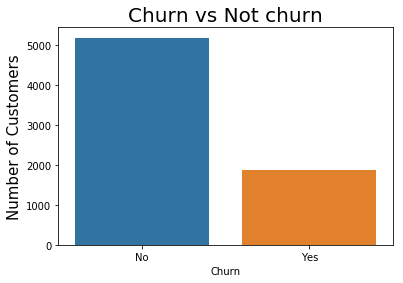

In [20]:
#Total number of churn vs not churn
plt.figure(figsize=(6,4))
ax= sns.countplot(x="Churn", data=telcom)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_title('Churn vs Not churn', fontsize=20)
plt.show()

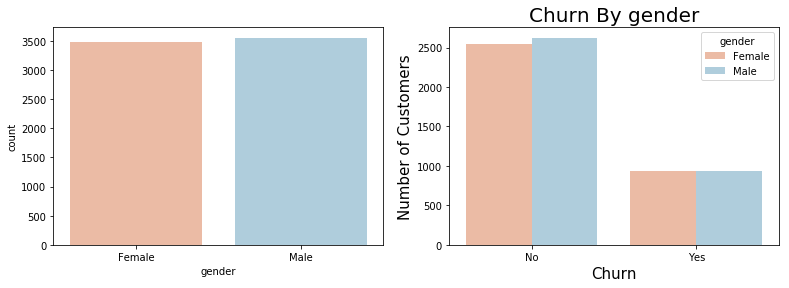

In [21]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 4))
sns.countplot(x="gender", data=telcom, palette="RdBu", ax=ax1)
sns.countplot(x="Churn",hue="gender", data=telcom,palette="RdBu",ax=ax2)
ax2.set_ylabel('Number of Customers', fontsize = 15)
ax2.set_xlabel('Churn', fontsize = 15)
ax2.set_title('Churn By gender', fontsize=20)
plt.show()

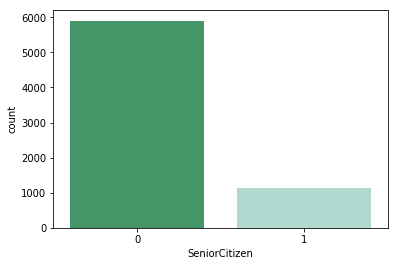

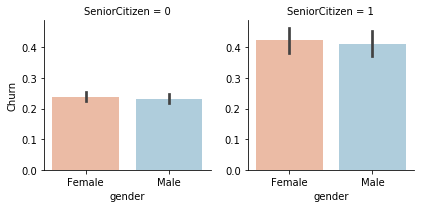

In [22]:
telcom['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
f, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="SeniorCitizen", data=telcom, ax=ax, palette = "BuGn_r")
g = sns.FacetGrid(telcom, col="SeniorCitizen")
ax2 = g.map(sns.barplot, "gender", "Churn", palette = "RdBu", order= ['Female', 'Male'])
plt.show()

Senior citizen churn more than those who are not

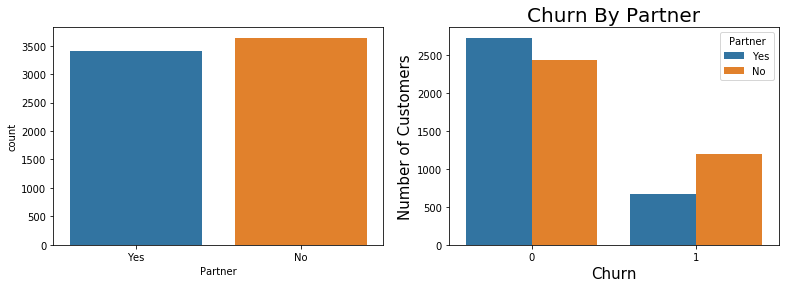

In [24]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 4))
sns.countplot(x="Partner", data=telcom, ax=ax1)
sns.countplot(x="Churn",hue="Partner", data=telcom,ax=ax2)
ax2.set_ylabel('Number of Customers', fontsize = 15)
ax2.set_xlabel('Churn', fontsize = 15)
ax2.set_title('Churn By Partner', fontsize=20)
plt.show()

Churn rate is more for if the customers don't have partner

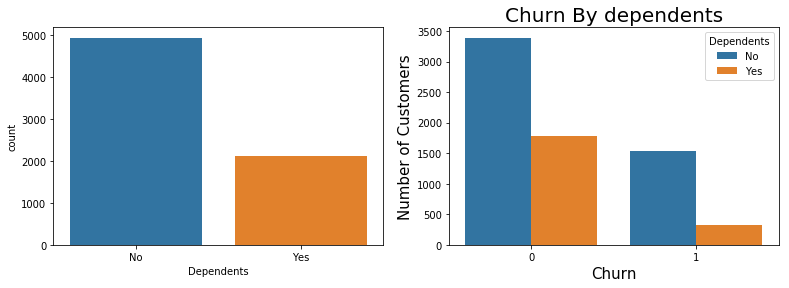

In [25]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(13,4))
sns.countplot(x="Dependents", data=telcom, ax=ax1)
sns.countplot(x="Churn",hue="Dependents", data=telcom,ax=ax2)
ax2.set_ylabel('Number of Customers', fontsize = 15)
ax2.set_xlabel('Churn', fontsize = 15)
ax2.set_title('Churn By dependents', fontsize=20)
plt.show()

Finding:
1. Churn rate is more if the customers don't have dependents or partners
2. Senior citizen are more likely to churn 
3. Churn is not affected based on gender

In [26]:
multiple_lines = telcom.groupby('MultipleLines')["Churn"].value_counts()/len(telcom)
multiple_lines

MultipleLines     Churn
No                0        0.360784
                  1        0.120545
No phone service  0        0.072696
                  1        0.024137
Yes               0        0.301150
                  1        0.120687
Name: Churn, dtype: float64

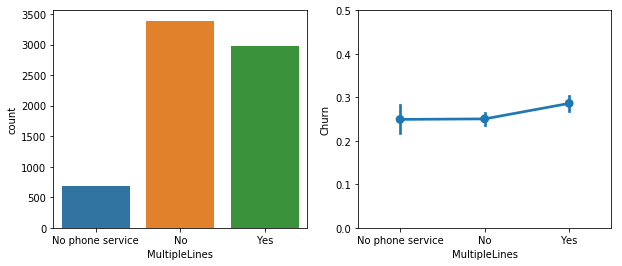

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x="MultipleLines", data=telcom, ax=ax1)
sns.pointplot(x="MultipleLines", y="Churn", data=telcom, ax=ax2)
ax2.set_ylim(0, 0.5)
plt.show()

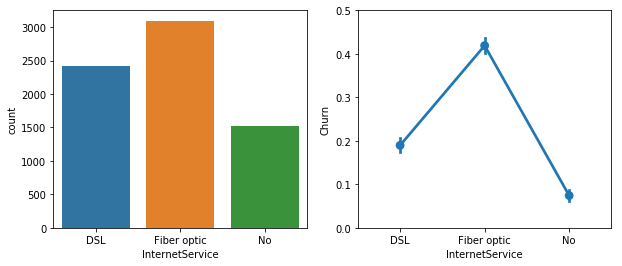

In [28]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x="InternetService", data=telcom, ax=ax1)
sns.pointplot(x="InternetService", y="Churn", data=telcom, ax=ax2)
ax2.set_ylim(0, 0.5)
plt.show()

In [81]:
#telcom['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)

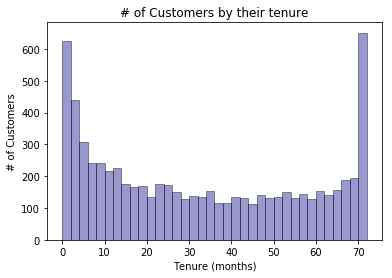

In [31]:
ax = sns.distplot(telcom['tenure'], hist=True, kde=False, 
            bins=int(180/5),color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')
plt.show()

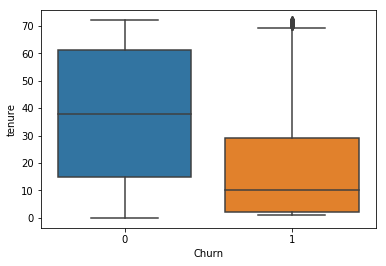

In [32]:
sns.boxplot(x = telcom.Churn, y = telcom.tenure)
plt.show()

Shorter the tenure, higher is the possibility of Churn

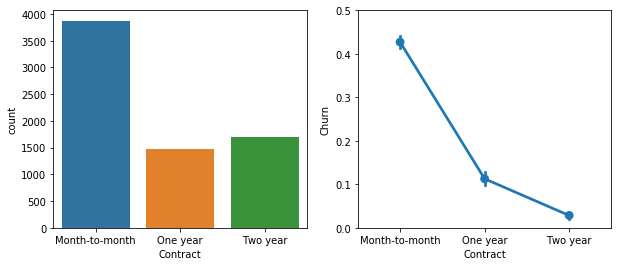

In [33]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x="Contract", data=telcom, ax=ax1)
sns.pointplot(x="Contract", y="Churn", data=telcom, ax=ax2)
ax2.set_ylim(0, 0.5)
plt.show()

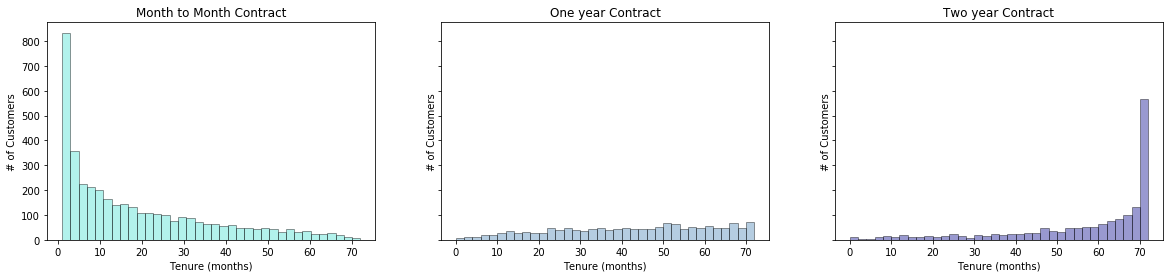

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,4))

ax = sns.distplot(telcom[telcom['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telcom[telcom['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One year Contract')

ax = sns.distplot(telcom[telcom['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two year Contract')
plt.show()

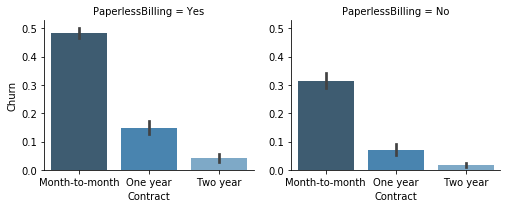

In [35]:
g = sns.FacetGrid(telcom, col="PaperlessBilling", aspect=1.2)
ax = g.map(sns.barplot, "Contract", "Churn", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
plt.show()

We can deduce that Month-to-Month contract customers churn more than one/two year contract. 
People who has enrolled for Paperless billing churn more than their counterparts

In [3]:
telcom['Count_OnlineServices'] = (telcom[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

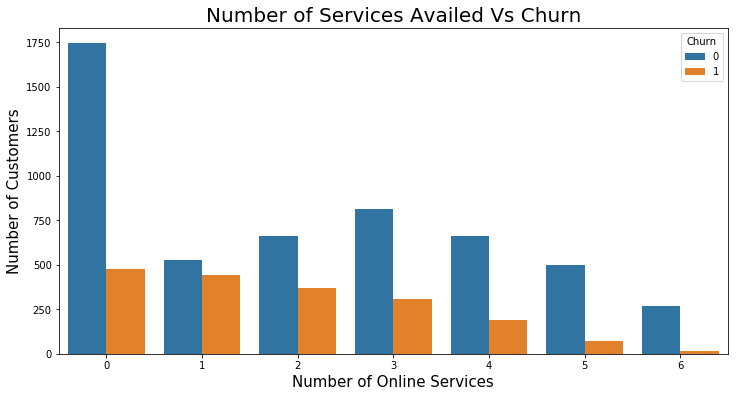

In [37]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Count_OnlineServices', hue='Churn', data=telcom)
ax.set_title('Number of Services Availed Vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_xlabel('Number of Online Services', fontsize=15)
plt.show()

In [5]:
agg = telcom.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['Churn']].mean()
agg[['Churn']] = np.round(agg[['Churn']], 2) * 100

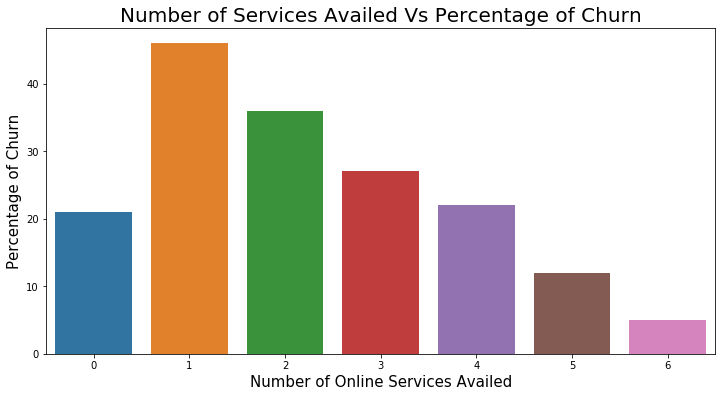

In [39]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Count_OnlineServices', y='Churn', data=agg)
ax.set_xlabel('Number of Online Services Availed', fontsize=15)
ax.set_ylabel('Percentage of Churn', fontsize=15)
ax.set_title('Number of Services Availed Vs Percentage of Churn', fontsize=20)
plt.show()

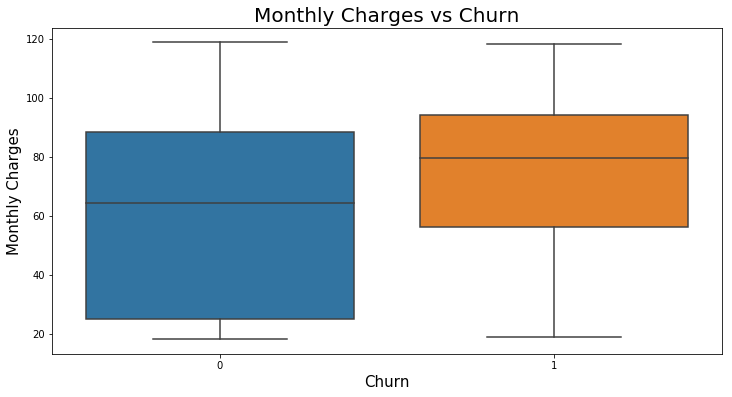

In [40]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=telcom)
ax.set_title('Monthly Charges vs Churn', fontsize=20)
ax.set_ylabel('Monthly Charges', fontsize=15)
ax.set_xlabel('Churn', fontsize=15)
plt.show()

Customers churn when monthly charges is 80 bucks and they don't churn when monthly charges is 63 bucks.

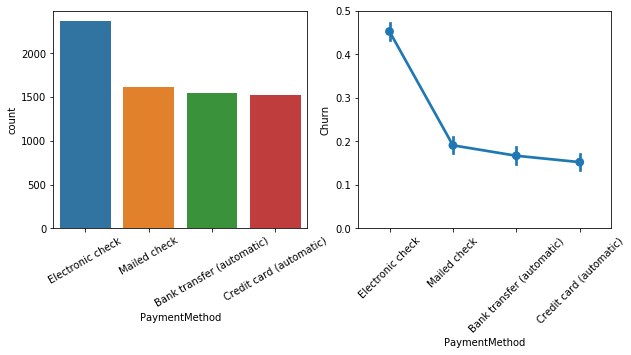

In [41]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x="PaymentMethod", data=telcom, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
sns.pointplot(x="PaymentMethod", y="Churn", data=telcom, ax=ax2)
plt.xticks(rotation=45)
ax2.set_ylim(0, 0.5)
plt.show()

Electronic check method has more churn rate than the other methods

# Predictive Modeling

In [4]:
#Data Manipulation
#Replacing spaces with null values in total charges column
#There are 11 values that contains spaces in Total charges field
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan).astype('float32')
telcom.isnull().sum()

#Removing missing values 
telcom.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telcom.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#del df2['Count_OnlineServices']

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2) #47 columns
df_dummies.head() 
df_dummies.shape

(7032, 47)

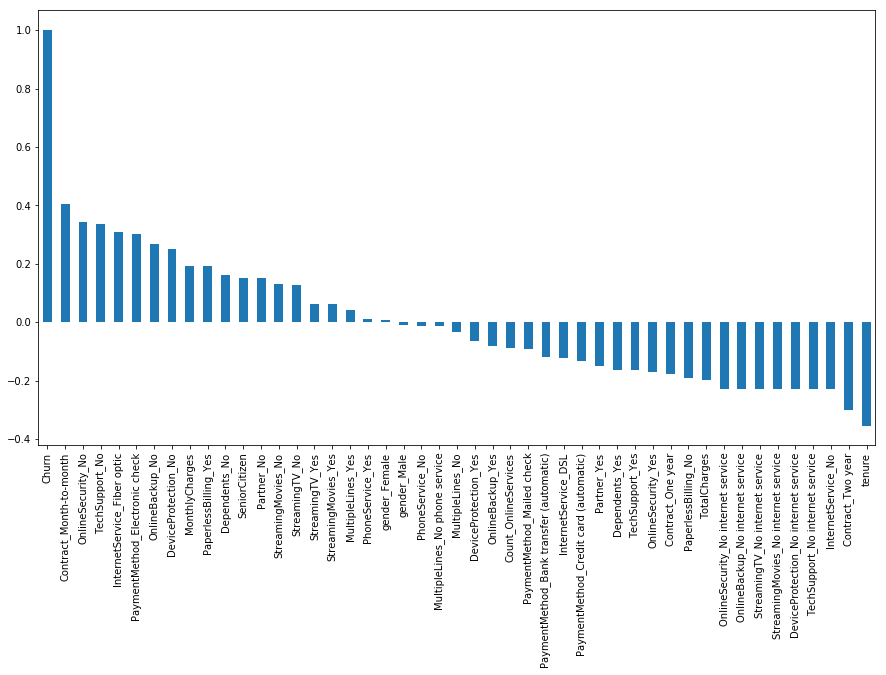

In [47]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [5]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
del df_dummies['Churn']
X= df_dummies
#X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

## 1. Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [94]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 10)] # Number of trees in random forest

max_depth = [int(x) for x in np.linspace(8, 15, num = 8)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Creating base model to tune
rf_class = RandomForestClassifier()

# 5-fold CV, Random search of parameters
rf_random_1 = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, 
                               n_iter = 35, cv = 5, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random_1.fit(X_train, y_train)

#print best parameters
print rf_random_1.best_params_

{'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, None], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   17.3s finished


{'n_estimators': 11, 'min_samples_split': 5, 'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 2}


In [96]:
rf_random_1.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 11}

In [151]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 30, num = 10)] # Number of trees in random forest

max_depth = [int(x) for x in np.linspace(8, 15, num = 8)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Creating base model to tune
rf_class = RandomForestClassifier()

# 5-fold CV, Random search of parameters
rf_random_2 = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, 
                               n_iter = 35, cv = 5, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random_2.fit(X_train, y_train)

#print best parameters
print rf_random_2.best_params_

{'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28, 30], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, None], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   20.0s finished


{'n_estimators': 27, 'min_samples_split': 5, 'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 4}


In [152]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 120, num = 15)] # Number of trees in random forest

max_depth = [int(x) for x in np.linspace(8, 15, num = 8)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Creating base model to tune
rf_class = RandomForestClassifier()

# 5-fold CV, Random search of parameters
rf_random_3 = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, 
                               n_iter = 35, cv = 5, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random_3.fit(X_train, y_train)

#print best parameters
print rf_random_3.best_params_

{'n_estimators': [100, 101, 102, 104, 105, 107, 108, 110, 111, 112, 114, 115, 117, 118, 120], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, None], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.1min finished


{'n_estimators': 102, 'min_samples_split': 5, 'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 4}


In [153]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 500, stop = 510, num = 10)] # Number of trees in random forest

max_depth = [int(x) for x in np.linspace(8, 15, num = 8)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Creating base model to tune
rf_class = RandomForestClassifier()

# 5-fold CV, Random search of parameters
rf_random_4 = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, 
                               n_iter = 35, cv = 5, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random_4.fit(X_train, y_train)

#print best parameters
print rf_random_4.best_params_

{'n_estimators': [500, 501, 502, 503, 504, 505, 506, 507, 508, 510], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, None], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  4.7min finished


{'n_estimators': 507, 'min_samples_split': 5, 'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 4}


In [154]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 600, stop = 615, num = 10)] # Number of trees in random forest

max_depth = [int(x) for x in np.linspace(8, 15, num = 8)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Creating base model to tune
rf_class = RandomForestClassifier()

# 5-fold CV, Random search of parameters
rf_random_5 = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, 
                               n_iter = 35, cv = 5, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random_5.fit(X_train, y_train)

#print best parameters
print rf_random_5.best_params_

{'n_estimators': [600, 601, 603, 605, 606, 608, 610, 611, 613, 615], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, None], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  6.4min finished


{'n_estimators': 600, 'min_samples_split': 10, 'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 4}


In [176]:
print rf_random_1.best_estimator_
#Best params returns the model along with n_estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [98]:
rf_random_1.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "Total number of trees in the forest: ", model.n_estimators
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random_1 = rf_random_1.best_estimator_
random_accuracy_1 = evaluate(best_random_1, X_test, y_test)

best_random_2 = rf_random_2.best_estimator_
random_accuracy_2 = evaluate(best_random_2, X_test, y_test)

best_random_3 = rf_random_3.best_estimator_
random_accuracy_3 = evaluate(best_random_3, X_test, y_test)

best_random_4 = rf_random_4.best_estimator_
random_accuracy_4 = evaluate(best_random_4, X_test, y_test)

best_random_5 = rf_random_5.best_estimator_
random_accuracy_5 = evaluate(best_random_5, X_test, y_test)

#####################################################################
Total number of trees in the forest:  10
#####################################################################

Test accuracy:  77.9620853081
Precision:  0.581453634085
Recall:  0.437735849057

Confusion matrix
[[1413  167]
 [ 298  232]]


             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1580
          1       0.58      0.44      0.50       530

avg / total       0.76      0.78      0.77      2110

#####################################################################
Total number of trees in the forest:  17
#####################################################################

Test accuracy:  80.663507109
Precision:  0.648058252427
Recall:  0.503773584906

Confusion matrix
[[1435  145]
 [ 263  267]]


             precision    recall  f1-score   support

          0       0.85      0.91      0.88      1580
          1       0.65      0.50      0.57       530

avg /

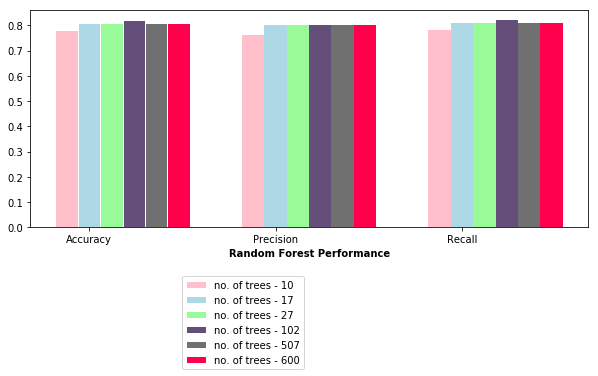

In [71]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
no_trees_10 =[0.78, 0.76, 0.78]
no_trees_17 = [0.81, 0.8,0.81]
no_trees_27 = [0.81, 0.8, 0.81]
no_trees_102 = [0.82, 0.8, 0.82]
no_trees_507 = [0.81, 0.8, 0.81]
no_trees_600 = [0.81, 0.8, 0.81]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, no_trees_10, color='#FFC0CB', width=barWidth, edgecolor='white', label='no. of trees - 10')
plt.bar(r2, no_trees_17, color='#ADD8E6', width=barWidth, edgecolor='white', label='no. of trees - 17')
plt.bar(r3, no_trees_27, color='#98FB98', width=barWidth, edgecolor='white', label='no. of trees - 27')
plt.bar(r4, no_trees_102, color='#644f7a', width=barWidth, edgecolor='white', label='no. of trees - 102')
plt.bar(r5, no_trees_507, color='#707070', width=barWidth, edgecolor='white', label='no. of trees - 507')
plt.bar(r6, no_trees_600, color='#ff004d', width=barWidth, edgecolor='white', label='no. of trees - 600')
 
# Add xticks on the middle of the group bars
plt.xlabel('Random Forest Performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(no_trees_10))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


In [157]:
#Random forest that contained about 100 trees gave highest accuracy 
tmp = rf_random_3.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.1min finished


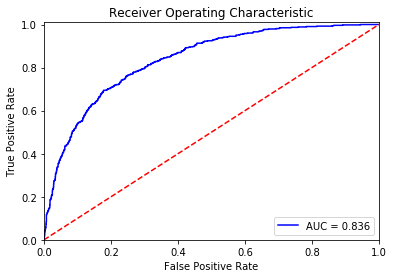

In [158]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_sample_score = tmp.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score[:,1])

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
import pandas as pd
rf_class.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf_class.feature_importances_,
                                   index = X_train.columns,
                                   columns= ['importance']).sort_values('importance',ascending=False)
feature_importances


,importance
TotalCharges,0.156297
MonthlyCharges,0.142001
tenure,0.132187
Contract_Month-to-month,0.059034
PaymentMethod_Electronic check,0.036848
TechSupport_No,0.032309
Count_OnlineServices,0.030191
InternetService_Fiber optic,0.022685
OnlineSecurity_No,0.020442
SeniorCitizen,0.020131


## 2. Logistic Regression

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
lr_1 = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
lr_1.fit(X_train, y_train)
lr_1.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.6s
[Parallel(n_jobs=3)]: Done  45 out of  50 | elapsed:    5.6s remaining:    0.5s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    5.8s finished


{'C': 7.0}

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

parameters = {
    'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
             }
lr = LogisticRegression()
lr_2 = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
lr_2.fit(X_train, y_train)
lr_2.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done  40 out of  45 | elapsed:    4.8s remaining:    0.5s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    5.0s finished


{'C': 0.08}

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

parameters = {
    'C': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
             }
lr = LogisticRegression()
lr_3 = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
lr_3.fit(X_train, y_train)
lr_3.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    4.7s finished


{'C': 0.009}

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

parameters = {
    'C': range(10,21)
             }
lr = LogisticRegression()
lr_4 = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
lr_4.fit(X_train, y_train)
lr_4.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  50 out of  55 | elapsed:    6.5s remaining:    0.6s
[Parallel(n_jobs=3)]: Done  55 out of  55 | elapsed:    6.7s finished


{'C': 18}

In [73]:
from sklearn import metrics
def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "C value: ", model.C
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

lr_base_model = LogisticRegression()
lr_base_model.fit(X_train, y_train)
lr_base_accuracy = evaluate(lr_base_model, X_test, y_test)

lr_model_1 = lr_1.best_estimator_
lr_model_1_accuracy = evaluate(lr_model_1, X_test, y_test)

lr_model_2 = lr_2.best_estimator_
lr_model_2_accuracy = evaluate(lr_model_2, X_test, y_test)

lr_model_3 = lr_3.best_estimator_
lr_model_3_accuracy = evaluate(lr_model_3, X_test, y_test)

lr_model_4 = lr_4.best_estimator_
lr_model_4_accuracy = evaluate(lr_model_4, X_test, y_test)


#####################################################################
C value:  1.0
#####################################################################

Test accuracy:  80.7582938389
Precision:  0.638392857143
Recall:  0.539622641509

Confusion matrix
[[1418  162]
 [ 244  286]]


             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1580
          1       0.64      0.54      0.58       530

avg / total       0.80      0.81      0.80      2110

#####################################################################
C value:  7.0
#####################################################################

Test accuracy:  80.5687203791
Precision:  0.632743362832
Recall:  0.539622641509

Confusion matrix
[[1414  166]
 [ 244  286]]


             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1580
          1       0.63      0.54      0.58       530

avg / total       0.80      0.81      0.80      2110

####

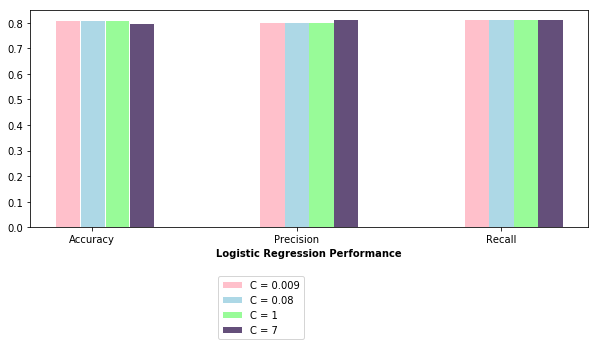

In [80]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
C009 =[0.81, 0.8, 0.81]
C08 = [0.81, 0.8, 0.81]
C1 = [0.81, 0.8, 0.81]
C7 = [0.80, 0.81, 0.81]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, C009, color='#FFC0CB', width=barWidth, edgecolor='white', label='C = 0.009')
plt.bar(r2, C08, color='#ADD8E6', width=barWidth, edgecolor='white', label='C = 0.08')
plt.bar(r3, C1, color='#98FB98', width=barWidth, edgecolor='white', label='C = 1')
plt.bar(r4, C7, color='#644f7a', width=barWidth, edgecolor='white', label='C = 7')

 
# Add xticks on the middle of the group bars
plt.xlabel('Logistic Regression Performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(C009))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


## 2. KNN

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create the parameter grid

param_grid = {
    'n_neighbors': [1,2,3,4,5]
    }

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_1 = GridSearchCV(estimator = knn, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
grid_search_1.fit(X_train, y_train)

grid_search_1.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   23.7s finished


{'n_neighbors': 4}

In [102]:
print grid_search_1.best_params_

{'n_neighbors': 4}


In [103]:
print grid_search_1.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


In [106]:
knn_model_1 = grid_search_1.best_estimator_
knn_model_1_accuracy = evaluate(knn_model_1, X_test, y_test)


#####################################################################
Number of neighbors:  4
#####################################################################

Test accuracy:  77.0616113744
Precision:  0.566860465116
Recall:  0.367924528302

Confusion matrix
[[1431  149]
 [ 335  195]]


             precision    recall  f1-score   support

          0       0.81      0.91      0.86      1580
          1       0.57      0.37      0.45       530

avg / total       0.75      0.77      0.75      2110



In [107]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid

param_grid = {
    'n_neighbors': [6,7,8,9,10]
    }

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_2 = GridSearchCV(estimator = knn, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
grid_search_2.fit(X_train, y_train)

grid_search_2.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.5s finished


{'n_neighbors': 8}

In [108]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid

param_grid = {
    'n_neighbors': [50,51,52,53,54,55,56,57,58,59,60]
    }

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_3 = GridSearchCV(estimator = knn, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
grid_search_3.fit(X_train, y_train)

grid_search_3.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.1min finished


{'n_neighbors': 58}

In [109]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid

param_grid = {
    'n_neighbors': [100,101,102,103,104,105,106,107,108,109,110]
    }

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_4 = GridSearchCV(estimator = knn, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
grid_search_4.fit(X_train, y_train)

grid_search_4.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.3min finished


{'n_neighbors': 100}

In [110]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid

param_grid = {
    'n_neighbors': [500,501,502,503,504,505,506,507,508,509,510]
    }

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_5 = GridSearchCV(estimator = knn, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
grid_search_5.fit(X_train, y_train)

grid_search_5.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.7min finished


{'n_neighbors': 507}

In [114]:
def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "Number of neighbors: ", model.n_neighbors
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

knn_base_model = KNeighborsClassifier(n_neighbors = 1)
knn_base_model.fit(X_train, y_train)
base_accuracy = evaluate(knn_base_model, X_test, y_test)

knn_model_1 = grid_search_1.best_estimator_
knn_model_1_accuracy = evaluate(knn_model_1, X_test, y_test)

knn_model_2 = grid_search_2.best_estimator_
knn_model_2_accuracy = evaluate(knn_model_2, X_test, y_test)

knn_model_3 = grid_search_3.best_estimator_
knn_model_3_accuracy = evaluate(knn_model_3, X_test, y_test)

knn_model_4 = grid_search_4.best_estimator_
knn_model_4_accuracy = evaluate(knn_model_4, X_test, y_test)

knn_model_5 = grid_search_5.best_estimator_
knn_model_5_accuracy = evaluate(knn_model_5, X_test, y_test)


#####################################################################
Number of neighbors:  1
#####################################################################

Test accuracy:  71.9431279621
Precision:  0.445804195804
Recall:  0.481132075472

Confusion matrix
[[1263  317]
 [ 275  255]]


             precision    recall  f1-score   support

          0       0.82      0.80      0.81      1580
          1       0.45      0.48      0.46       530

avg / total       0.73      0.72      0.72      2110

#####################################################################
Number of neighbors:  4
#####################################################################

Test accuracy:  77.0616113744
Precision:  0.566860465116
Recall:  0.367924528302

Confusion matrix
[[1431  149]
 [ 335  195]]


             precision    recall  f1-score   support

          0       0.81      0.91      0.86      1580
          1       0.57      0.37      0.45       530

avg / total       0.75      0.77      

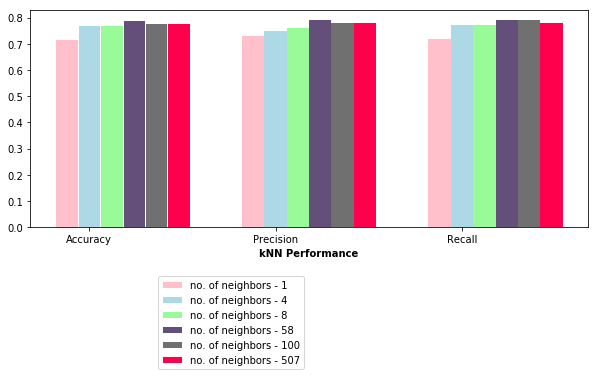

In [78]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
knn_1 =[0.72, 0.73, 0.72]
knn_4 = [0.77, 0.75,0.77]
knn_8 = [0.77, 0.76, 0.77]
knn_58 = [0.79, 0.79, 0.79]
knn_100 = [0.78, 0.78, 0.79]
knn_507 = [0.78, 0.78, 0.78]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, knn_1, color='#FFC0CB', width=barWidth, edgecolor='white', label='no. of neighbors - 1')
plt.bar(r2, knn_4, color='#ADD8E6', width=barWidth, edgecolor='white', label='no. of neighbors - 4')
plt.bar(r3, knn_8, color='#98FB98', width=barWidth, edgecolor='white', label='no. of neighbors - 8')
plt.bar(r4, knn_58, color='#644f7a', width=barWidth, edgecolor='white', label='no. of neighbors - 58')
plt.bar(r5, knn_100, color='#707070', width=barWidth, edgecolor='white', label='no. of neighbors - 100')
plt.bar(r6, knn_507, color='#ff004d', width=barWidth, edgecolor='white', label='no. of neighbors - 507')
 
# Add xticks on the middle of the group bars
plt.xlabel('kNN Performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(knn_1))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


## 3. Decision Tree Classifier

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Create the parameter grid

param_grid = {
    'max_depth': [5,6,7,8,9,10]
    }

dt = tree.DecisionTreeClassifier()

# Instantiate the grid search model
dt_grid_search_1 = GridSearchCV(estimator = dt, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
dt_grid_search_1.fit(X_train, y_train)

dt_grid_search_1.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished


{'max_depth': 5}

In [180]:
range(10,20)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Create the parameter grid

param_grid = {
    'max_depth': range(10,20)
    }

dt = tree.DecisionTreeClassifier()

# Instantiate the grid search model
dt_grid_search_2 = GridSearchCV(estimator = dt, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
dt_grid_search_2.fit(X_train, y_train)

dt_grid_search_2.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished


{'max_depth': 11}

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Create the parameter grid

param_grid = {
    'max_depth': range(50,60)
    }

dt = tree.DecisionTreeClassifier()

# Instantiate the grid search model
dt_grid_search_3 = GridSearchCV(estimator = dt, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
dt_grid_search_3.fit(X_train, y_train)

dt_grid_search_3.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


{'max_depth': 54}

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Create the parameter grid

param_grid = {
    'max_depth': range(100,110)
    }

dt = tree.DecisionTreeClassifier()

# Instantiate the grid search model
dt_grid_search_4 = GridSearchCV(estimator = dt, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
dt_grid_search_4.fit(X_train, y_train)

dt_grid_search_4.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.6s finished


{'max_depth': 104}

In [119]:
def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "Decision Tree with depth: ", model.max_depth
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

dt_base_model = tree.DecisionTreeClassifier(max_depth=3)
dt_base_model.fit(X_train, y_train)
dt_base_accuracy = evaluate(dt_base_model, X_test, y_test)

dt_model_1 = dt_grid_search_1.best_estimator_
dt_model_1_accuracy = evaluate(dt_model_1, X_test, y_test)

dt_model_2 = dt_grid_search_2.best_estimator_
dt_model_2_accuracy = evaluate(dt_model_2, X_test, y_test)

dt_model_3 = dt_grid_search_3.best_estimator_
dt_model_3_accuracy = evaluate(dt_model_3, X_test, y_test)

dt_model_4 = dt_grid_search_4.best_estimator_
dt_model_4_accuracy = evaluate(dt_model_4, X_test, y_test)


#####################################################################
Decision Tree with depth:  3
#####################################################################

Test accuracy:  79.6682464455
Precision:  0.686346863469
Recall:  0.350943396226

Confusion matrix
[[1495   85]
 [ 344  186]]


             precision    recall  f1-score   support

          0       0.81      0.95      0.87      1580
          1       0.69      0.35      0.46       530

avg / total       0.78      0.80      0.77      2110

#####################################################################
Decision Tree with depth:  5
#####################################################################

Test accuracy:  78.3886255924
Precision:  0.566071428571
Recall:  0.598113207547

Confusion matrix
[[1337  243]
 [ 213  317]]


             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1580
          1       0.57      0.60      0.58       530

avg / total       0.79      

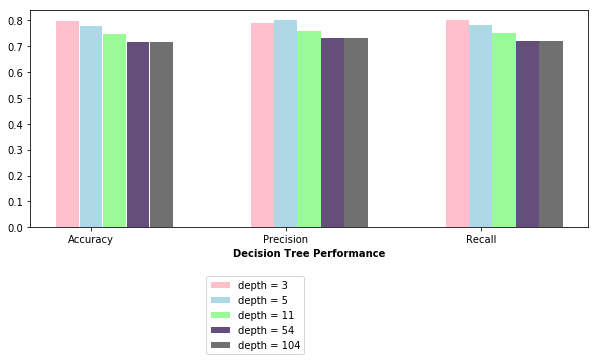

In [79]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
depth_3 =[0.80, 0.79, 0.80]
depth_5 = [0.78, 0.80,0.78]
depth_11 = [0.75, 0.76, 0.75]
depth_54 = [0.72, 0.73, 0.72]
depth_104 = [0.72, 0.73, 0.72]

# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, depth_3, color='#FFC0CB', width=barWidth, edgecolor='white', label='depth = 3')
plt.bar(r2, depth_5, color='#ADD8E6', width=barWidth, edgecolor='white', label='depth = 5')
plt.bar(r3, depth_11, color='#98FB98', width=barWidth, edgecolor='white', label='depth = 11')
plt.bar(r4, depth_54, color='#644f7a', width=barWidth, edgecolor='white', label='depth = 54')
plt.bar(r5, depth_104, color='#707070', width=barWidth, edgecolor='white', label='depth = 104')
 
# Add xticks on the middle of the group bars
plt.xlabel('Decision Tree Performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(depth_3))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


## 4. Logistic Regression

In [91]:
print "###############################################################################"
print "Trial 1"
print "###############################################################################"

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

lr = LogisticRegressionCV(tol=1e-2, solver='newton-cg', max_iter=20, cv=6)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

m1a = (accuracy_score(y_test, y_predict))
m1p =(precision_score(y_test, y_predict, average='weighted'))
m1r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m1a*100
print "Precision: ", m1p
print "Recall: ", m1r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Trial 2"
print "###############################################################################"

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

lr = LogisticRegressionCV(tol=1e-4, solver='newton-cg', max_iter=20, cv=6)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

m2a = (accuracy_score(y_test, y_predict))
m2p =(precision_score(y_test, y_predict, average='weighted'))
m2r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m2a*100
print "Precision: ", m2p
print "Recall: ", m2r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Trial 3"
print "###############################################################################"

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

lr = LogisticRegressionCV(tol=1e-2, solver='liblinear', max_iter=50, cv=6)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

m3a = (accuracy_score(y_test, y_predict))
m3p =(precision_score(y_test, y_predict, average='weighted'))
m3r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m3a*100
print "Precision: ", m3p
print "Recall: ", m3r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Trial 4"
print "###############################################################################"

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

lr = LogisticRegressionCV(tol=1e-4, solver='liblinear', max_iter=50, cv=6)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

m4a = (accuracy_score(y_test, y_predict))
m4p =(precision_score(y_test, y_predict, average='weighted'))
m4r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m4a*100
print "Precision: ", m4p
print "Recall: ", m4r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Trial 5"
print "###############################################################################"

from sklearn.metrics import accuracy_score

lr = LogisticRegressionCV(tol=1e-2, solver='lbfgs', max_iter=100, cv=6)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

m5a = (accuracy_score(y_test, y_predict))
m5p =(precision_score(y_test, y_predict, average='weighted'))
m5r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m5a*100
print "Precision: ", m5p
print "Recall: ", m5r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Trial 6"
print "###############################################################################"

from sklearn.metrics import accuracy_score

lr = LogisticRegressionCV(tol=1e-4, solver='lbfgs', max_iter=500, cv=6)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

m6a = (accuracy_score(y_test, y_predict))
m6p =(precision_score(y_test, y_predict, average='weighted'))
m6r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m6a*100
print "Precision: ", m6p
print "Recall: ", m6r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Trial 7"
print "###############################################################################"

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(tol=1e-4, solver='saga', max_iter=2000)
lr.fit(X_train, y_train)


y_predict = lr.predict(X_test)

m7a = (accuracy_score(y_test, y_predict))
m7p =(precision_score(y_test, y_predict, average='weighted'))
m7r = (recall_score(y_test, y_predict, average='weighted'))

print "\nTest accuracy: ", m7a*100
print "Precision: ", m7p
print "Recall: ", m7r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)


###############################################################################
Trial 1
###############################################################################

Test accuracy:  80.8056872038
Precision:  0.80049210311
Recall:  0.808056872038

Confusion matrix
[[1261  319]
 [ 275  255]]


             precision    recall  f1-score   support

          0       0.82      0.80      0.81      1580
          1       0.44      0.48      0.46       530

avg / total       0.73      0.72      0.72      2110

###############################################################################
Trial 2
###############################################################################

Test accuracy:  80.8056872038
Precision:  0.80049210311
Recall:  0.808056872038

Confusion matrix
[[1261  319]
 [ 275  255]]


             precision    recall  f1-score   support

          0       0.82      0.80      0.81      1580
          1       0.44      0.48      0.46       530

avg / total       0.73      0.72

## 5. Naive Bayes

In [82]:
print "###############################################################################"
print "Gaussian NB"
print "###############################################################################"

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Fitting on training data
gnb.fit(X_train, y_train)

# Make cross validated predictions
predictions = gnb.predict(X_test)

m1a = metrics.accuracy_score(y_test, predictions) # Test accuracy
m1p = precision_score(y_test, predictions)
m1r = recall_score(y_test, predictions)
report = classification_report(y_test, predictions)

print "\nTest accuracy: ", m1a*100
print "Precision: ", m1p
print "Recall: ", m1r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)

print "###############################################################################"
print "Bernoulli NB"
print "###############################################################################"

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

#Fitting on training data
bnb.fit(X_train, y_train)

# Make cross validated predictions
predictions = bnb.predict(X_test)

m2a = metrics.accuracy_score(y_test, predictions) # Test accuracy
m2p = precision_score(y_test, predictions)
m2r = recall_score(y_test, predictions)
report = classification_report(y_test, predictions)

print "\nTest accuracy: ", m2a*100
print "Precision: ", m2p
print "Recall: ", m2r
print "\nConfusion matrix"
print(confusion_matrix(y_test,predictions))  
print "\n"
print(report)


###############################################################################
Gaussian NB
###############################################################################

Test accuracy:  68.1990521327
Precision:  0.42957042957
Recall:  0.811320754717

Confusion matrix
[[1009  571]
 [ 100  430]]


             precision    recall  f1-score   support

          0       0.91      0.64      0.75      1580
          1       0.43      0.81      0.56       530

avg / total       0.79      0.68      0.70      2110

###############################################################################
Bernoulli NB
###############################################################################

Test accuracy:  71.1848341232
Precision:  0.456570155902
Recall:  0.77358490566

Confusion matrix
[[1092  488]
 [ 120  410]]


             precision    recall  f1-score   support

          0       0.90      0.69      0.78      1580
          1       0.46      0.77      0.57       530

avg / total       0.79 

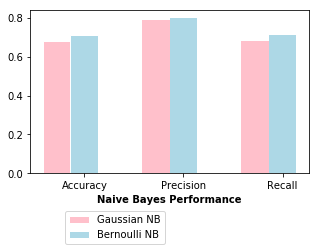

In [92]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.28

# set height of bar
gnb =[0.68, 0.79, 0.68]
bnb = [0.71, 0.80,0.71]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(5,3))
plt.bar(r1, gnb, color='#FFC0CB', width=barWidth, edgecolor='white', label='Gaussian NB')
plt.bar(r2, bnb, color='#ADD8E6', width=barWidth, edgecolor='white', label='Bernoulli NB')

# Add xticks on the middle of the group bars
plt.xlabel('Naive Bayes Performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(depth_3))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


## 6. Support Vector Machines

### Case 1: Linear Kernel

In [14]:
#Model 1
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [0.001,0.002, 0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009] }

svm_l = svm.SVC(kernel='linear')

# Instantiate the grid search model
svm_grid_search1 = GridSearchCV(estimator = svm_l, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search1.fit(X_train, y_train)

svm_grid_search1.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   27.2s finished


{'C': 0.006}

In [17]:
#Model 2
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [0.01,0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09] }

svm_l = svm.SVC(kernel='linear')

# Instantiate the grid search model
svm_grid_search2 = GridSearchCV(estimator = svm_l, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search2.fit(X_train, y_train)

svm_grid_search2.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   26.0s finished


{'C': 0.03}

In [18]:
#Model 3
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [0.1,0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9] }

svm_l = svm.SVC(kernel='linear')

# Instantiate the grid search model
svm_grid_search3 = GridSearchCV(estimator = svm_l, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search3.fit(X_train, y_train)

svm_grid_search3.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   29.6s finished


{'C': 0.1}

In [19]:
#Model 4
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': range(1,11) }

svm_l = svm.SVC(kernel='linear')

# Instantiate the grid search model
svm_grid_search4 = GridSearchCV(estimator = svm_l, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search4.fit(X_train, y_train)

svm_grid_search4.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.1s finished


{'C': 2}

In [20]:
#Model 5
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': range(20,31) }

svm_l = svm.SVC(kernel='linear')

# Instantiate the grid search model
svm_grid_search5 = GridSearchCV(estimator = svm_l, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search5.fit(X_train, y_train)

svm_grid_search5.best_params_


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.5min finished


{'C': 22}

In [21]:
#Model 6
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': range(50,61) }

svm_l = svm.SVC(kernel='linear')

# Instantiate the grid search model
svm_grid_search6 = GridSearchCV(estimator = svm_l, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search6.fit(X_train, y_train)

svm_grid_search6.best_params_


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  2.4min finished


{'C': 50}

In [22]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "Linear kernel for C: ", model.C
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

best_svm_l1 = svm_grid_search1.best_estimator_
svm_linear_acc = evaluate(best_svm_l1, X_test, y_test)

best_svm_l2 = svm_grid_search2.best_estimator_
svm_linear_acc2 = evaluate(best_svm_l2, X_test, y_test)

best_svm_l3 = svm_grid_search3.best_estimator_
svm_linear_acc3 = evaluate(best_svm_l3, X_test, y_test)

best_svm_l4 = svm_grid_search4.best_estimator_
svm_linear_acc4 = evaluate(best_svm_l4, X_test, y_test)

best_svm_l5 = svm_grid_search5.best_estimator_
svm_linear_acc5 = evaluate(best_svm_l5, X_test, y_test)

best_svm_l6 = svm_grid_search6.best_estimator_
svm_linear_acc6 = evaluate(best_svm_l6, X_test, y_test)


#####################################################################
Linear kernel for C:  0.006
#####################################################################

Test accuracy:  80.2369668246
Precision:  0.632318501171
Recall:  0.509433962264

Confusion matrix
[[1423  157]
 [ 260  270]]


             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1580
          1       0.63      0.51      0.56       530

avg / total       0.79      0.80      0.79      2110

#####################################################################
Linear kernel for C:  0.03
#####################################################################

Test accuracy:  80.4265402844
Precision:  0.630872483221
Recall:  0.532075471698

Confusion matrix
[[1415  165]
 [ 248  282]]


             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1580
          1       0.63      0.53      0.58       530

avg / total       0.80      0.8

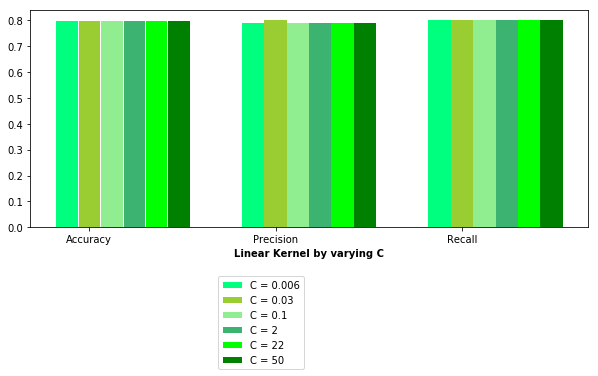

In [94]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
C_006 =[0.80, 0.79, 0.80]
C_03 = [0.8, 0.8,0.8]
C_p1 = [0.80, 0.79, 0.80]
C_2 = [0.80, 0.79, 0.80]
C_22 = [0.80, 0.79, 0.80]
C_50 = [0.80, 0.79, 0.80]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, C_006, color='#00FF7F', width=barWidth, edgecolor='white', label='C = 0.006')
plt.bar(r2, C_03, color='#9ACD32', width=barWidth, edgecolor='white', label='C = 0.03')
plt.bar(r3, C_p1, color='#90EE90', width=barWidth, edgecolor='white', label='C = 0.1')
plt.bar(r4, C_2, color='#3CB371', width=barWidth, edgecolor='white', label='C = 2')
plt.bar(r5, C_22, color='#00FF00', width=barWidth, edgecolor='white', label='C = 22')
plt.bar(r6, C_50, color='#008000', width=barWidth, edgecolor='white', label='C = 50')
 
# Add xticks on the middle of the group bars
plt.xlabel('Linear Kernel by varying C', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(C_006))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


### Case 2: Poly kernel

In [23]:
#Model 1
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [0.001,0.002, 0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009] }

svm_p = svm.SVC(kernel='poly')

# Instantiate the grid search model
svm_grid_search_p1 = GridSearchCV(estimator = svm_p, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_p1.fit(X_train, y_train)

svm_grid_search_p1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   32.2s finished


{'C': 0.001}

In [24]:
#Model 2
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [0.01,0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09] }

svm_p = svm.SVC(kernel='poly')

# Instantiate the grid search model
svm_grid_search_p2 = GridSearchCV(estimator = svm_p, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_p2.fit(X_train, y_train)

svm_grid_search_p2.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   30.6s finished


{'C': 0.01}

In [25]:
#Model 3
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [0.1,0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9] }

svm_p = svm.SVC(kernel='poly')

# Instantiate the grid search model
svm_grid_search_p3 = GridSearchCV(estimator = svm_p, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_p3.fit(X_train, y_train)

svm_grid_search_p3.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   32.3s finished


{'C': 0.9}

In [26]:
#Model 4
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': range(1,11) }

svm_p = svm.SVC(kernel='poly')

# Instantiate the grid search model
svm_grid_search_p4 = GridSearchCV(estimator = svm_p, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_p4.fit(X_train, y_train)

svm_grid_search_p4.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.9s finished


{'C': 6}

In [27]:
#Model 5
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': range(20,31) }

svm_p = svm.SVC(kernel='poly')

# Instantiate the grid search model
svm_grid_search_p5 = GridSearchCV(estimator = svm_p, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_p5.fit(X_train, y_train)

svm_grid_search_p5.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   34.4s finished


{'C': 27}

In [28]:
#Model 6
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': range(50,61) }

svm_p = svm.SVC(kernel='poly')

# Instantiate the grid search model
svm_grid_search_p6 = GridSearchCV(estimator = svm_p, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_p6.fit(X_train, y_train)

svm_grid_search_p6.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   34.3s finished


{'C': 59}

In [29]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "Poly kernel for C: ", model.C
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

best_svm_poly_1 = svm_grid_search_p1.best_estimator_
svm_poly_1_acc= evaluate(best_svm_poly_1, X_test, y_test)

best_svm_poly_2 = svm_grid_search_p2.best_estimator_
svm_poly_2_acc= evaluate(best_svm_poly_2, X_test, y_test)

best_svm_poly_3 = svm_grid_search_p3.best_estimator_
svm_poly_3_acc= evaluate(best_svm_poly_3, X_test, y_test)

best_svm_poly_4 = svm_grid_search_p4.best_estimator_
svm_poly_4_acc= evaluate(best_svm_poly_4, X_test, y_test)

best_svm_poly_5 = svm_grid_search_p5.best_estimator_
svm_poly_5_acc= evaluate(best_svm_poly_5, X_test, y_test)

best_svm_poly_6 = svm_grid_search_p6.best_estimator_
svm_poly_6_acc= evaluate(best_svm_poly_6, X_test, y_test)


#####################################################################
Poly kernel for C:  0.001
#####################################################################


C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Test accuracy:  74.8815165877
Precision:  0.0
Recall:  0.0

Confusion matrix
[[1580    0]
 [ 530    0]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1580
          1       0.00      0.00      0.00       530

avg / total       0.56      0.75      0.64      2110

#####################################################################
Poly kernel for C:  0.01
#####################################################################

Test accuracy:  74.8815165877
Precision:  0.0
Recall:  0.0

Confusion matrix
[[1580    0]
 [ 530    0]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1580
          1       0.00      0.00      0.00       530

avg / total       0.56      0.75      0.64      2110

#####################################################################
Poly kernel for C:  0.9
#####################################################################

Test accuracy:  79.6208530

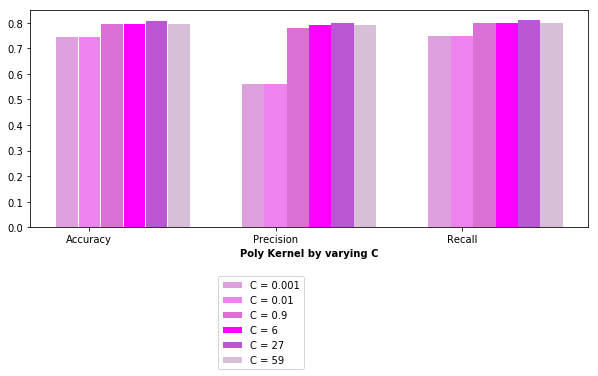

In [122]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
C_001 =[0.75, 0.56, 0.75]
C_01 = [0.75, 0.56,0.75]
C_p9 = [0.80, 0.78, 0.80]
C_6 = [0.80, 0.79, 0.80]
C_27 = [0.81, 0.8, 0.81]
C_59 = [0.80, 0.79, 0.80]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, C_001, color='#DDA0DD', width=barWidth, edgecolor='white', label='C = 0.001')
plt.bar(r2, C_01, color='#EE82EE', width=barWidth, edgecolor='white', label='C = 0.01')
plt.bar(r3, C_p9, color='#DA70D6', width=barWidth, edgecolor='white', label='C = 0.9')
plt.bar(r4, C_6, color='#FF00FF', width=barWidth, edgecolor='white', label='C = 6')
plt.bar(r5, C_27, color='#BA55D3', width=barWidth, edgecolor='white', label='C = 27')
plt.bar(r6, C_59, color='#D8BFD8', width=barWidth, edgecolor='white', label='C = 59')
 
# Add xticks on the middle of the group bars
plt.xlabel('Poly Kernel by varying C', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(C_001))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


### Case 3: RBF Kernel

In [96]:
#Model 1
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = { 'C': [0.001,0.002, 0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009]}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbf1 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbf1.fit(X_train, y_train)

svm_grid_search_rbf1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   40.6s finished


{'C': 0.001}

In [97]:
#Model 2
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = { 'C': [0.01,0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbf2 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbf2.fit(X_train, y_train)

svm_grid_search_rbf2.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   42.8s finished


{'C': 0.09}

In [98]:
#Model 3
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = { 'C': [0.1,0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbf3 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbf3.fit(X_train, y_train)

svm_grid_search_rbf3.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   38.8s finished


{'C': 0.9}

In [99]:
#Model 4
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = { 'C': range(1,11)}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbf4 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbf4.fit(X_train, y_train)

svm_grid_search_rbf4.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.5s finished


{'C': 3}

In [101]:
#Model 6
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = { 'C': range(20,31)}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbf6 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbf6.fit(X_train, y_train)

svm_grid_search_rbf6.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   50.1s finished


{'C': 27}

In [102]:
#Model 7
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = { 'C': range(50,61)}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbf7 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbf7.fit(X_train, y_train)

svm_grid_search_rbf7.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   56.1s finished


{'C': 53}

In [105]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "RBF kernel for C: ", model.C
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

best_svm_rbf_1 = svm_grid_search_rbf1.best_estimator_
svm_rbf_1_acc= evaluate(best_svm_rbf_1, X_test, y_test)

best_svm_rbf_2 = svm_grid_search_rbf2.best_estimator_
svm_rbf_2_acc= evaluate(best_svm_rbf_2, X_test, y_test)

best_svm_rbf_3 = svm_grid_search_rbf3.best_estimator_
svm_rbf_3_acc= evaluate(best_svm_rbf_3, X_test, y_test)

#best_svm_rbf_4 = svm_grid_search_rbf4.best_estimator_
#svm_rbf_4_acc= evaluate(best_svm_rbf_4, X_test, y_test)

best_svm_rbf_5 = svm_grid_search_rbf5.best_estimator_
svm_rbf_5_acc= evaluate(best_svm_rbf_5, X_test, y_test)

best_svm_rbf_6 = svm_grid_search_rbf6.best_estimator_
svm_rbf_6_acc= evaluate(best_svm_rbf_6, X_test, y_test)

best_svm_rbf_7 = svm_grid_search_rbf7.best_estimator_
svm_rbf_7_acc= evaluate(best_svm_rbf_7, X_test, y_test)

#####################################################################
RBF kernel for C:  0.001
#####################################################################

Test accuracy:  74.8815165877
Precision:  0.0
Recall:  0.0

Confusion matrix
[[1580    0]
 [ 530    0]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1580
          1       0.00      0.00      0.00       530

avg / total       0.56      0.75      0.64      2110

#####################################################################
RBF kernel for C:  0.09
#####################################################################

Test accuracy:  80.4739336493
Precision:  0.666666666667
Recall:  0.445283018868

Confusion matrix
[[1462  118]
 [ 294  236]]


             precision    recall  f1-score   support

          0       0.83      0.93      0.88      1580
          1       0.67      0.45      0.53       530

avg / total       0.79      0.80      0.79      2110

#####

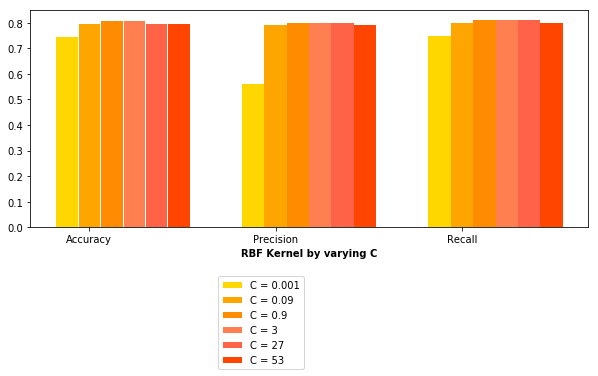

In [117]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
C_001 =[0.75, 0.56, 0.75]
C_09 = [0.8, 0.79,0.8]
C_p9 = [0.81, 0.80, 0.81]
C_3 = [0.81, 0.80, 0.81]
C_27 = [0.80, 0.80, 0.81]
C_53 = [0.80, 0.79, 0.80]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, C_001, color='#FFD700', width=barWidth, edgecolor='white', label='C = 0.001')
plt.bar(r2, C_09, color='#FFA500', width=barWidth, edgecolor='white', label='C = 0.09')
plt.bar(r3, C_p9, color='#FF8C00', width=barWidth, edgecolor='white', label='C = 0.9')
plt.bar(r4, C_3, color='#FF7F50', width=barWidth, edgecolor='white', label='C = 3')
plt.bar(r5, C_27, color='#FF6347', width=barWidth, edgecolor='white', label='C = 27')
plt.bar(r6, C_53, color='#FF4500', width=barWidth, edgecolor='white', label='C = 53')
 
# Add xticks on the middle of the group bars
plt.xlabel('RBF Kernel by varying C', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(C_001))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


### RBF kernel for different gamma for best 'C'

In [106]:
#Model 1
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [3],
              'gamma': [0.01,0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbfg1 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbfg1.fit(X_train, y_train)

svm_grid_search_rbfg1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   46.2s finished


{'C': 3, 'gamma': 0.02}

In [118]:
#Model 2
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [3],
              'gamma': [0.001,0.002, 0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009]}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbfg2 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbfg2.fit(X_train, y_train)

svm_grid_search_rbfg2.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   51.7s finished


{'C': 3, 'gamma': 0.007}

In [108]:
#Model 3
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [3],
              'gamma': [0.1,0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbfg3 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbfg3.fit(X_train, y_train)

svm_grid_search_rbfg3.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   57.6s finished


{'C': 3, 'gamma': 0.1}

In [109]:
#Model 4
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [3],
              'gamma': range(1,11)}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbfg4 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbfg4.fit(X_train, y_train)

svm_grid_search_rbfg4.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


{'C': 3, 'gamma': 1}

In [110]:
#Model 5
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [3],
              'gamma': range(100,111)}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbfg5 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbfg5.fit(X_train, y_train)

svm_grid_search_rbfg5.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.7min finished


{'C': 3, 'gamma': 101}

In [111]:
#Model 6
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create the parameter grid
param_grid = {'C': [3],
              'gamma': range(1000,1011)}

svm_rbf = svm.SVC(kernel='rbf')

# Instantiate the grid search model
svm_grid_search_rbfg6 = GridSearchCV(estimator = svm_rbf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
svm_grid_search_rbfg6.fit(X_train, y_train)

svm_grid_search_rbfg6.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.7min finished


{'C': 3, 'gamma': 1000}

In [119]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    print "#####################################################################"
    print "RBF kernel for C: 3 and gamma", model.gamma
    print "#####################################################################"
    predictions = model.predict(X_test)
    m_a = metrics.accuracy_score(y_test, predictions) # Test accuracy
    m_p = precision_score(y_test, predictions)
    m_r = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print "\nTest accuracy: ", m_a*100
    print "Precision: ", m_p
    print "Recall: ", m_r
    print "\nConfusion matrix"
    print(confusion_matrix(y_test,predictions))  
    print "\n"
    print(report)
    return m_a

best_svm_rbfg_1 = svm_grid_search_rbfg1.best_estimator_
svm_rbfg_1_acc= evaluate(best_svm_rbfg_1, X_test, y_test)

best_svm_rbfg_2 = svm_grid_search_rbfg2.best_estimator_
svm_rbfg_2_acc= evaluate(best_svm_rbfg_2, X_test, y_test)

best_svm_rbfg_3 = svm_grid_search_rbfg3.best_estimator_
svm_rbfg_3_acc= evaluate(best_svm_rbfg_3, X_test, y_test)

best_svm_rbfg_4 = svm_grid_search_rbfg4.best_estimator_
svm_rbfg_4_acc= evaluate(best_svm_rbfg_4, X_test, y_test)

best_svm_rbfg_5 = svm_grid_search_rbfg5.best_estimator_
svm_rbfg_5_acc= evaluate(best_svm_rbfg_5, X_test, y_test)

best_svm_rbfg_6 = svm_grid_search_rbfg6.best_estimator_
svm_rbfg_6_acc= evaluate(best_svm_rbfg_6, X_test, y_test)

#####################################################################
RBF kernel for C: 3 and gamma 0.02
#####################################################################

Test accuracy:  80.9952606635
Precision:  0.658476658477
Recall:  0.505660377358

Confusion matrix
[[1441  139]
 [ 262  268]]


             precision    recall  f1-score   support

          0       0.85      0.91      0.88      1580
          1       0.66      0.51      0.57       530

avg / total       0.80      0.81      0.80      2110

#####################################################################
RBF kernel for C: 3 and gamma 0.007
#####################################################################

Test accuracy:  80.4265402844
Precision:  0.63700234192
Recall:  0.51320754717

Confusion matrix
[[1425  155]
 [ 258  272]]


             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1580
          1       0.64      0.51      0.57       530

avg / total      

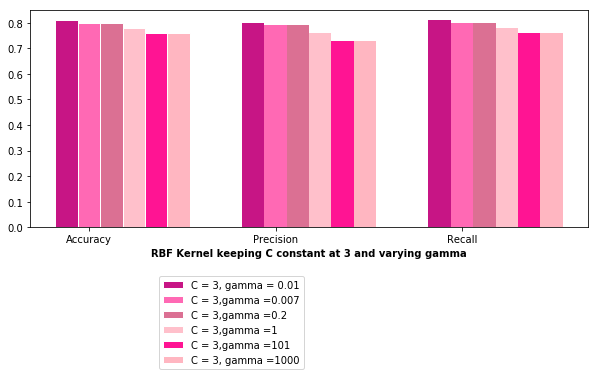

In [123]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

# set width of bar
barWidth = 0.12

# set height of bar
g_01 =[0.81, 0.80, 0.81]
g_007 = [0.8, 0.79,0.8]
g_p2 = [0.80, 0.79, 0.8]
g_1 = [0.78, 0.76, 0.78]
g_101 = [0.76, 0.73, 0.76]
g_1000 = [0.76, 0.73, 0.76]


# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


# Make the plot
plt.figure(figsize=(10,4))
plt.bar(r1, g_01, color='#C71585', width=barWidth, edgecolor='white', label='C = 3, gamma = 0.01')
plt.bar(r2, g_007, color='#FF69B4', width=barWidth, edgecolor='white', label='C = 3,gamma =0.007')
plt.bar(r3, g_p2, color='#DB7093', width=barWidth, edgecolor='white', label='C = 3,gamma =0.2')
plt.bar(r4, g_1, color='#FFC0CB', width=barWidth, edgecolor='white', label='C = 3,gamma =1')
plt.bar(r5, g_101, color='#FF1493', width=barWidth, edgecolor='white', label='C = 3,gamma =101')
plt.bar(r6, g_1000, color='#FFB6C1', width=barWidth, edgecolor='white', label='C = 3, gamma =1000')
 
# Add xticks on the middle of the group bars
plt.xlabel('RBF Kernel keeping C constant at 3 and varying gamma', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(g_01))], ['Accuracy', 'Precision', 'Recall'])
 
# Create legend & Show graphic
pylab.legend(loc= 0, bbox_to_anchor=(0.5, -0.2))
plt.show()


## Balanced Dataset

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

('Number transactions X_train dataset: ', (4922, 46))
('Number transactions y_train dataset: ', (4922L,))
('Number transactions X_test dataset: ', (2110, 46))
('Number transactions y_test dataset: ', (2110L,))


### Applying SMOTE (Synthetic Minority Oversampling Technique) for balancing

In [9]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

#2294 of minority class samples are addded

Before OverSampling, counts of label '1': 1314
Before OverSampling, counts of label '0': 3608 

After OverSampling, the shape of train_X: (7216L, 46L)
After OverSampling, the shape of train_y: (7216L,) 

After OverSampling, counts of label '1': 3608
After OverSampling, counts of label '0': 3608


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

# Create the parameter grid
parameters = { 
    'C': np.linspace(1, 10, 10) 
}

lr = LogisticRegression()

# Instantiate the grid search model
lr_grid_search_1 = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)

# Fit the grid search model on train set
lr_grid_search_1.fit(X_train_res, y_train_res.ravel())

lr_grid_search_1.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    9.4s finished


{'C': 4.0}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [14]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test accuracy:  75.1658767773
Precision:  0.518343195266
Recall:  0.789189189189

Confusion matrix
[[1148  407]
 [ 117  438]]


             precision    recall  f1-score   support

          0       0.91      0.74      0.81      1555
          1       0.52      0.79      0.63       555

avg / total       0.81      0.75      0.76      2110

ROC AUC SCORE 0.763726427392
Recall metric in the testing dataset: 78%


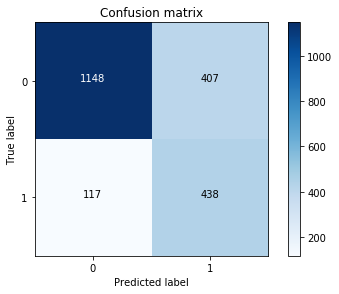

In [15]:
y_pre = clf.predict(X_test)

m1a = accuracy_score(y_test, y_pre) # Test accuracy
m1p = precision_score(y_test, y_pre)
m1r = recall_score(y_test, y_pre)
report = classification_report(y_test, y_pre)

print "\nTest accuracy: ", m1a*100
print "Precision: ", m1p
print "Recall: ", m1r
print "\nConfusion matrix"
print(confusion_matrix(y_test, y_pre))  
print "\n"
print(report)

print "ROC AUC SCORE", roc_auc_score(y_test, y_pre)



cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()